In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads/day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.shape

(730, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### checking for null values

In [8]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### checking for the duplicate 

In [9]:
df[df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Removing the unwanted column

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.



In [10]:
df.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [11]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [12]:
df1 = df

In [13]:
df1['season']=df1['season'].astype('category')
df1['weathersit']=df1['weathersit'].astype('category')
df1['mnth']=df1['mnth'].astype('category')
df1['weekday']=df1['weekday'].astype('category')

In [14]:
df1 = pd.get_dummies(df1, drop_first=True)

In [15]:
df1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0


### EXPLORATORY DATA ANALYSIS

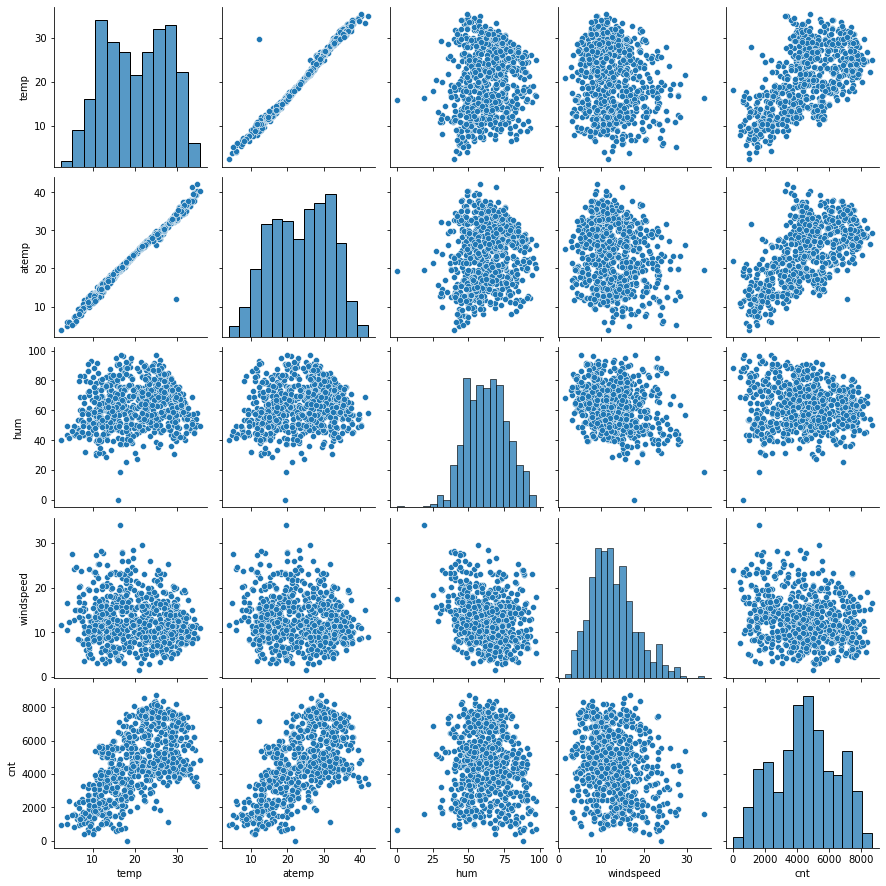

In [16]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed','cnt']])

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

In [17]:
l = ["season","mnth","weathersit","holiday","weekday","workingday"]

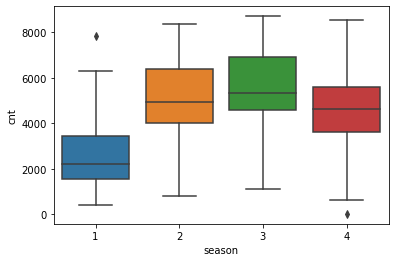

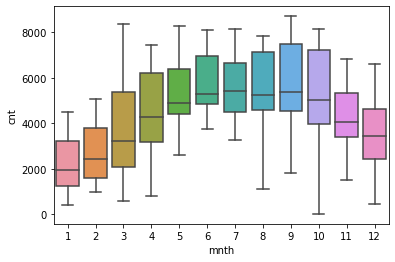

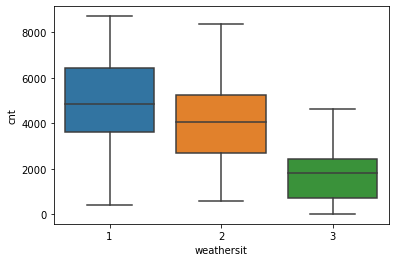

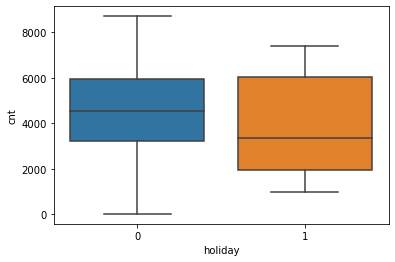

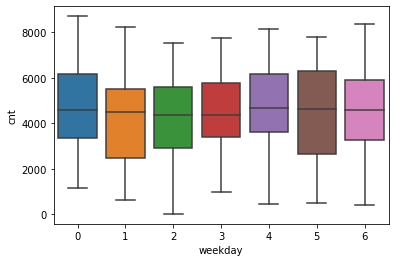

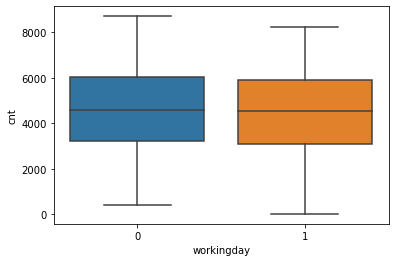

In [18]:
for i in l:
    sns.boxplot(df[i],df["cnt"])
    plt.show()

The inference that We could derive were:

season: As compared to all 4 season, season 3 has the more booking of average of 5000+ and followed by season 2 and 4 also have good booking. so season will be a good predictor for the dependent variable

mnth: Most of the booking held on 5 to 10 months, median over 5000+ This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.


weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.


workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

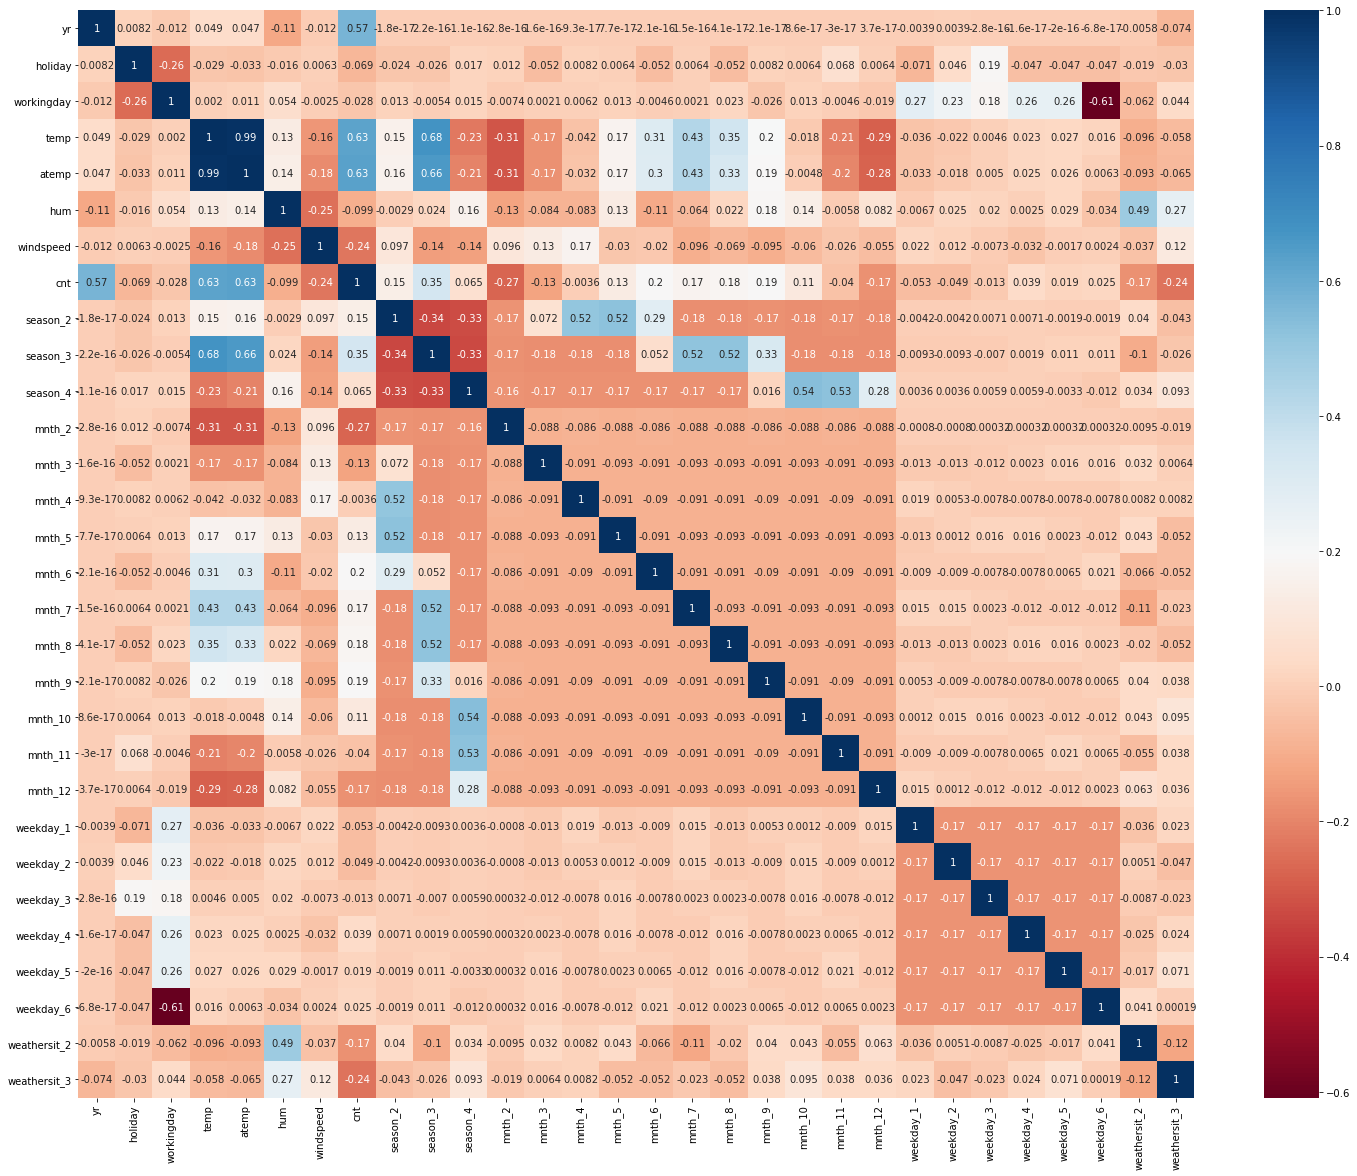

In [19]:
plt.figure(figsize = (25,20))
sns.heatmap(df1.corr(), annot = True, cmap="RdBu")
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

### RESCALING THE FEATURES

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df1[num_vars] = scaler.fit_transform(df1[num_vars])

In [23]:
df1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,0.243025,0.193709,0.671380,0.675656,0.240681,0,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,0.241986,0.230993,0.606684,0.274350,0.353543,0,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,0.241986,0.214393,0.774208,0.210260,0.151749,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.497001,0.676936,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0


In [24]:
x = df1.drop(["cnt"],axis=1)
y = df1[["cnt"]]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [70]:
X_train.shape

(511, 29)

In [72]:
X_test.shape

(219, 29)

### Linear model

#### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
linear_mdoel = LinearRegression()
linear_mdoel.fit(X_train, y_train)

rfe = RFE(linear_mdoel)  
rfe = rfe.fit(X_train,y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('weekday_1', False, 16),
 ('weekday_2', False, 15),
 ('weekday_3', False, 14),
 ('weekday_4', False, 8),
 ('weekday_5', False, 9),
 ('weekday_6', False, 12),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

###### Creating X_test dataframe with RFE selected variables

In [32]:
X_train_rfe = X_train[col]

#### Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,397.33
3,atemp,381.95
4,hum,17.53
7,season_3,8.26
5,windspeed,4.50
6,season_2,3.81
8,season_4,3.01
12,weathersit_2,2.18
0,yr,1.93
9,mnth_8,1.76


#### Linear Model Using Stats

In [39]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [40]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.59e-188
Time:                        10:51:56   Log-Likelihood:                 521.62
No. Observations:                 511   AIC:                            -1013.
Df Residuals:                     496   BIC:                            -949.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2425      0.029      8.225   

#### Linear model using Stats 2

Removing feature atemp due to high p-value & High VIF

In [41]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.27
3,hum,17.05
6,season_3,8.25
4,windspeed,4.37
5,season_2,3.80
7,season_4,3.00
11,weathersit_2,2.18
0,yr,1.93
8,mnth_8,1.72
10,mnth_10,1.66


In [43]:
X_train_lm2 = sm.add_constant(X_train_new)

In [44]:
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [45]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.74e-189
Time:                        10:55:53   Log-Likelihood:                 521.17
No. Observations:                 511   AIC:                            -1014.
Df Residuals:                     497   BIC:                            -955.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2445      0.029      8.316   

#### Linear model using Stats 3

Removing feature 'hum' becuase of its Very High 'VIF' value.
Temp feature has high VIF value,even though it is high we are not removing becuase based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'

In [46]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.19
5,season_3,7.83
3,windspeed,3.77
4,season_2,3.75
6,season_4,2.87
0,yr,1.92
7,mnth_8,1.72
9,mnth_10,1.64
10,weathersit_2,1.45
8,mnth_9,1.44


In [48]:
X_train_lm3 = sm.add_constant(X_train_new)

In [49]:
lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [50]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.13e-185
Time:                        11:01:39   Log-Likelihood:                 509.79
No. Observations:                 511   AIC:                            -993.6
Df Residuals:                     498   BIC:                            -938.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1333      0.018      7.318   

#### Linear model using Stats 4

Removing the variable 'season3' based on its Very High 'VIF' value.

In [51]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,3.55
5,season_4,1.93
0,yr,1.90
4,season_2,1.83
8,mnth_10,1.63
6,mnth_8,1.54
9,weathersit_2,1.43
7,mnth_9,1.35
10,weathersit_3,1.07


In [53]:
X_train_lm4 = sm.add_constant(X_train_new)


In [54]:
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [55]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          7.09e-183
Time:                        11:08:15   Log-Likelihood:                 500.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     499   BIC:                            -925.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1192      0.018      6.534   

#### Linear model using Stats 5

Removing the variable 'mnth_10' based on its Very High p-value.

In [56]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.14
3,windspeed,3.55
0,yr,1.90
4,season_2,1.81
6,mnth_8,1.53
8,weathersit_2,1.43
5,season_4,1.42
7,mnth_9,1.30
9,weathersit_3,1.06
1,holiday,1.04


In [59]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [60]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.74e-182
Time:                        11:10:49   Log-Likelihood:                 496.59
No. Observations:                 511   AIC:                            -971.2
Df Residuals:                     500   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1115      0.018      6.150   

#### Linear model using Stats 6

Removing the variable 'mnth_8' based on its Very High p-value.

In [61]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.84
3,windspeed,3.50
0,yr,1.90
4,season_2,1.58
7,weathersit_2,1.43
5,season_4,1.33
6,mnth_9,1.21
8,weathersit_3,1.06
1,holiday,1.04


In [63]:
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [65]:
lr6.params

const           0.108012
yr              0.237065
holiday        -0.091029
temp            0.564416
windspeed      -0.118722
season_2        0.085922
season_4        0.133808
mnth_9          0.084455
weathersit_2   -0.076664
weathersit_3   -0.216144
dtype: float64

In [64]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          6.20e-182
Time:                        11:12:35   Log-Likelihood:                 492.41
No. Observations:                 511   AIC:                            -964.8
Df Residuals:                     501   BIC:                            -922.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1080      0.018      5.927   

this model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

##### Model 6 Co efficient

In [67]:
lr6.params

const           0.108012
yr              0.237065
holiday        -0.091029
temp            0.564416
windspeed      -0.118722
season_2        0.085922
season_4        0.133808
mnth_9          0.084455
weathersit_2   -0.076664
weathersit_3   -0.216144
dtype: float64

#### Predicting Using Final Model

In [71]:
xtrain,ytrain = df1[["yr","holiday","temp","windspeed","season_2","season_4","mnth_9","weathersit_2","weathersit_3"]].head(511),df1[["cnt"]].head(511)

In [73]:
xtest,ytest = df1[["yr","holiday","temp","windspeed","season_2","season_4","mnth_9","weathersit_2","weathersit_3"]].tail(219),df1[["cnt"]].tail(219)

In [81]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest,has_constant='add')

In [92]:
model6 = sm.OLS(ytrain, xtrain).fit()

In [93]:
y_pred = model6.predict(xtest)

#### Actual vs Predicted 

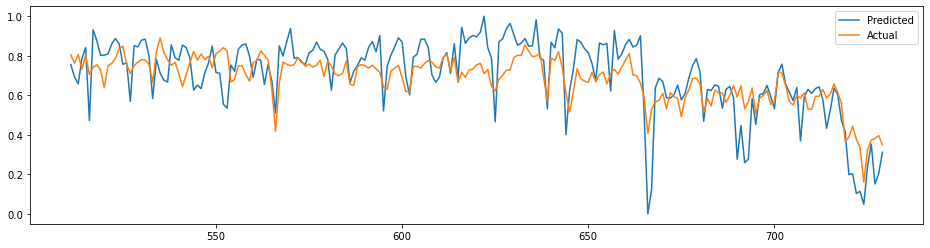

In [100]:
plt.figure(figsize=(16,4))
plt.plot(ytest)
plt.plot(y_pred)
plt.legend(labels = ["Predicted","Actual"])
plt.show()

#### Evaluation

In [101]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest,y_pred)

0.01587101843114128

In [102]:
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)

0.56219082903399

#### FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are

Temperature (temp) - A coefficient value of ‘0.564416’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.564 units.
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.216144’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.216 units.
Year (yr) - A coefficient value of ‘0.237065’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.237 units.
